## ECON 210C PS2 Q5

Define the solution in section 1.8 of the lecture notes. Start by loading required packages and defining the required parameters.

In [1]:
using Distributions
using Plots; gr()
srand(92037)
α = 0.33
const β = 0.99
const δ = 0.02
const ρ = 0.95
const σ = 0.007
const T = 500

500

Define the ratios of steady-state variables we need.

In [2]:
ky_ratio = 3.32
ck_ratio = 1/(ky_ratio) - δ
kc_ratio = 1/ck_ratio
yc_ratio = (1/ky_ratio)*kc_ratio

1.0711225364181662

Define the coefficients of the policy functions and steady state $k$.

In [3]:
γ = 1/β + 1 - (1/kc_ratio)*(1 - β*(1-δ))*(α-1)
v_kk = (γ - sqrt(γ^2 - 4/β))/2
v_ck = kc_ratio*(1/β - v_kk)
v_kz = (yc_ratio*(1-ρ) + (1-β*(1-δ))*ρ)/(kc_ratio*(1-ρ) + kc_ratio*(1/β - v_kk) - (1 - β*(1-δ))*(α-1))
v_cz = yc_ratio - kc_ratio*v_kz

0.4565067324848987

Define the policy functions.

In [4]:
function C_policy(k, z, v_ck, v_cz)
    c = v_ck*k + v_cz*z
    return c
end

C_policy (generic function with 1 method)

In [5]:
function K_policy(k, z, v_kk, v_kz)
    k = v_kk*k + v_kz*z
    return k
end

K_policy (generic function with 1 method)

Define a function that simulates a path for $z_t$ given initial conditions and parameters.

In [6]:
function Simulate_z_path(T, ρ, σ, z0, shock_magnitude)
    d = Normal(0, σ) # Create normal distribution object
    ϵ_path = rand(d, T) # Draw a vector of shocks
    z_path = zeros(T)
    z_path[round(Int64, T/2)] = shock_magnitude
    
    # Iterate z forward in time
    z_path[1] = ρ*z0 + ϵ_path[1]
    for t = 2:T
        z_path[t] += ρ*z_path[t-1] + ϵ_path[t]
    end
    
    return z_path
end     

Simulate_z_path (generic function with 1 method)

Define a function that simulates path of $c_t$ and $k_t$ given initial $k$ and path of $z_t$.

In [7]:
function Simulate_system(v_ck, v_cz, v_kk, v_kz, k0, T, ρ, σ, z0, shock_magnitude)
    c_path = zeros(T)
    k_path = zeros(T)
    i_path = zeros(T)
    y_path = zeros(T)
    w_path = zeros(T)
    z_path = Simulate_z_path(T, ρ, σ, z0, shock_magnitude)
    
    for t = 2:T
        k_path[t] = v_kk*k_path[t-1] + v_kz*z_path[t]
        c_path[t] = v_ck*k_path[t-1] + v_cz*z_path[t]
        i_path[t] = (k_path[t] - (1-δ)*k_path[t-1])/δ
        y_path[t] = z_path[t] + α*k_path[t-1]
        w_path[t] = y_path[t]
    end
    
    return (k_path, c_path, i_path, y_path, w_path, z_path)
end

Simulate_system (generic function with 1 method)

## Part (a)

Run simulation and compute standard deviations of variables.

In [8]:
(k_path, c_path, i_path, y_path, w_path, z_path) = Simulate_system(v_ck, v_cz, v_kk, v_kz, 0, T, ρ, σ, 0, 0)
y_sd = std(y_path)
c_sd = std(c_path)
i_sd = std(i_path)
w_sd = std(w_path)
println("Standard deviations are $y_sd for output, $c_sd for consumption, $i_sd for investment, and $w_sd for wages.")

Standard deviations are 0.037996467515170634 for output, 0.022961236259258087 for consumption, 0.14492887452440112 for investment, and 0.037996467515170634 for wages.


From FRED data, the standard deviations in percentage deviations of output, consumption, investment, and wages for the period 1953 - 1996 is 0.982, 0.754, 4.57, and 1.10 respectively. From our simulation here, the standard deviations are 0.038, 0.023, 0.144, and 0.038 respectively. They are similar in the sense that the relative volatilities seem to be the same: investment is a lot more volatile than the other variables, while consumption is not volatile, while the volatilities of output and wages are similar.

## Part (b)

Run simulation with unit 1 shock to $z$ at T/2.

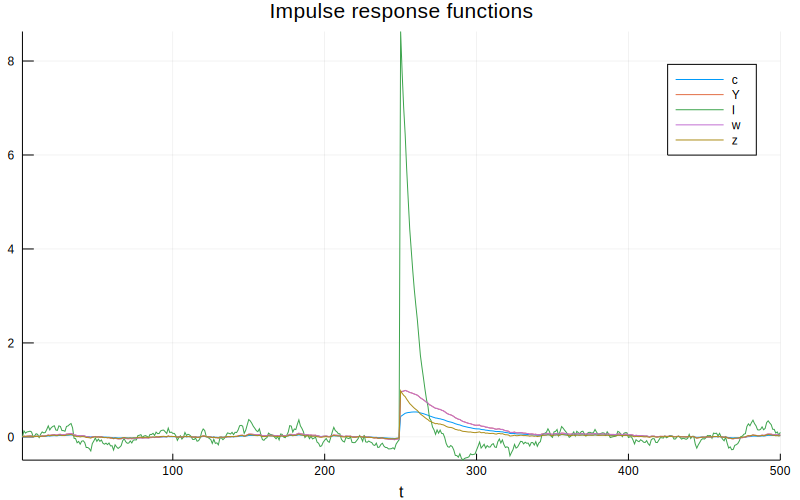

In [9]:
(k_shock, c_shock, i_shock, y_shock, w_shock, z_shock) = Simulate_system(v_ck, v_cz, v_kk, v_kz, 0, T, ρ, σ, 0, 1)
T_vect = linspace(1, T, T)

irf_plot = plot(T_vect, [c_shock, y_shock, i_shock, w_shock, z_shock], title = "Impulse response functions", xlabel = "t", ylabel = "", label = ["c", "Y", "I", "w", "z"], legend = :topright, size=(800,500))
display(irf_plot)

There is a big increase in investment, and both output and consumption remainds elevated for a while, but as the technology shock is transitory the variables soon return to steady-state values.

## Part (c)

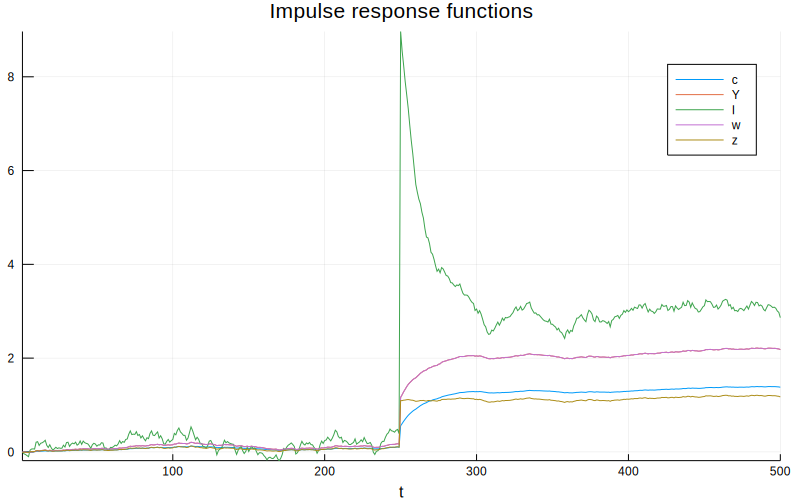

In [10]:
(k_rho, c_rho, i_rho, y_rho, w_rho, z_rho) = Simulate_system(v_ck, v_cz, v_kk, v_kz, 0, T, 1, σ, 0, 1)

irf_rho_plot = plot(T_vect, [c_rho, y_rho, i_rho, w_rho, z_rho], title = "Impulse response functions", xlabel = "t", ylabel = "", label = ["c", "Y", "I", "w", "z"], legend = :topright, size=(800,500))
display(irf_rho_plot)

As shocks to technology are persistent, the one unit shock leads to a permanent increase in all the variables. As before, investment increases by a lot relative to the other variables.

## Part (d).

Redefine the coefficients used and repeat the exercise in parts (a)-(c).

In [11]:
α = 2/3
γ = 1/β + 1 - (1/kc_ratio)*(1 - β*(1-δ))*(α-1)
v_kk = (γ - sqrt(γ^2 - 4/β))/2
v_ck = kc_ratio*(1/β - v_kk)
v_kz = (yc_ratio*(1-ρ) + (1-β*(1-δ))*ρ)/(kc_ratio*(1-ρ) + kc_ratio*(1/β - v_kk) - (1 - β*(1-δ))*(α-1))
v_cz = yc_ratio - kc_ratio*v_kz

0.32478594774486136

Compute standard deviation without shock.

In [12]:
(k_path, c_path, i_path, y_path, w_path, z_path) = Simulate_system(v_ck, v_cz, v_kk, v_kz, 0, T, ρ, σ, 0, 0)
y_sd = std(y_path)
c_sd = std(c_path)
i_sd = std(i_path)
w_sd = std(w_path)
println("Standard deviations are $y_sd for output, $c_sd for consumption, $i_sd for investment, and $w_sd for wages.")

Standard deviations are 0.053495360948423866 for output, 0.016576986712306188 for consumption, 0.15739230174792126 for investment, and 0.053495360948423866 for wages.


Add one unit shock to $z$ and T/2.

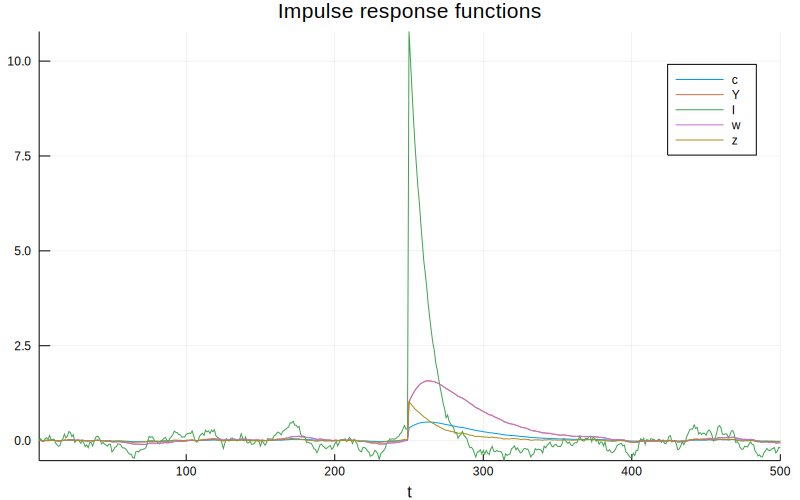

In [13]:
(k_shock, c_shock, i_shock, y_shock, w_shock, z_shock) = Simulate_system(v_ck, v_cz, v_kk, v_kz, 0, T, ρ, σ, 0, 1)
T_vect = linspace(1, T, T)
irf_plot = plot(T_vect, [c_shock, y_shock, i_shock, w_shock, z_shock], title = "Impulse response functions", xlabel = "t", ylabel = "", label = ["c", "Y", "I", "w", "z"], legend = :topright, size=(800,500))
display(irf_plot)

Investment, consumption, output, and wages all increased by more than the case with $\alpha = 0.33$.

Repeat with $\rho = 1$.

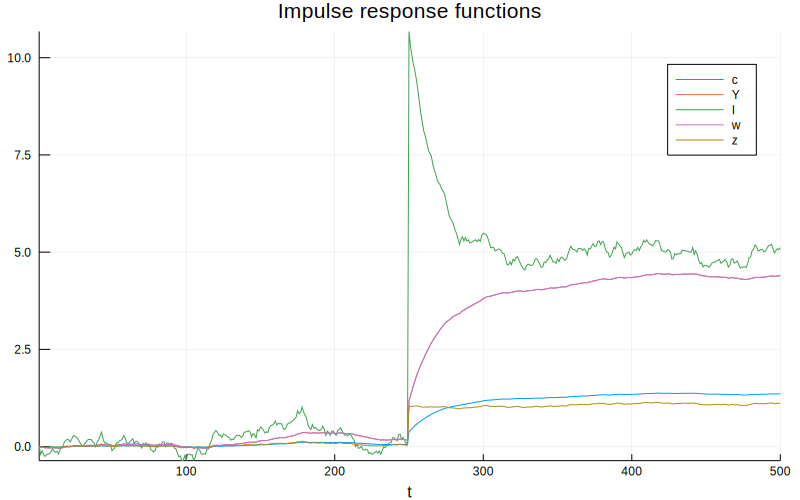

In [14]:
(k_rho, c_rho, i_rho, y_rho, w_rho, z_rho) = Simulate_system(v_ck, v_cz, v_kk, v_kz, 0, T, 1, σ, 0, 1)

irf_rho_plot = plot(T_vect, [c_rho, y_rho, i_rho, w_rho, z_rho], title = "Impulse response functions", xlabel = "t", ylabel = "", label = ["c", "Y", "I", "w", "z"], legend = :topright, size=(800,500))
display(irf_rho_plot)

Compared to before, with higher $\alpha$, consumption, output, wages, and investment all increased to a higher level.